In [0]:
# https://keras.io/
#!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


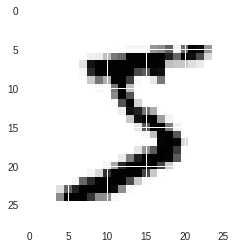

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
from keras.layers import MaxPooling2D
model = Sequential()

model.add(Convolution2D(32,3,3,activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(32,3,3,activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(128,3,3,activation='relu'))
model.add(Convolution2D(30, 1, activation='relu'))


model.add(Convolution2D(10,8))

model.add(Dropout((0.2)))

model.add(Flatten())


model.add(Activation('softmax'))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [0]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        2912      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 10)        330       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 64)        5824      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 10)        650       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=30, nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/15
60000/60000 [==============================] - 26s 427us/step - loss: 0.3802 - acc: 0.8412
Epoch 2/15
60000/60000 [==============================] - 25s 413us/step - loss: 0.2640 - acc: 0.8711
Epoch 3/15
60000/60000 [==============================] - 25s 414us/step - loss: 0.2416 - acc: 0.8778
Epoch 4/15
60000/60000 [==============================] - 25s 413us/step - loss: 0.2309 - acc: 0.8789
Epoch 5/15
60000/60000 [==============================] - 25s 413us/step - loss: 0.2269 - acc: 0.8792
Epoch 6/15
60000/60000 [==============================] - 25s 413us/step - loss: 0.2191 - acc: 0.8827
Epoch 7/15
60000/60000 [==============================] - 25s 413us/step - loss: 0.2153 - acc: 0.8828
Epoch 8/15
60000/60000 [==============================] - 25s 413us/step - loss: 0.2135 - acc: 0.8845
Epoch 9/15
60000/60000 [==============================] - 25s 412us/step - loss: 0.2083 - acc: 0.8855
Epoch 10/15
60000/60000 [==============================] - 25s 414us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03602010896976731, 0.9924]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[6.5170111e-16 2.2497222e-14 7.4747127e-12 6.5280930e-13 2.4840922e-17
  2.9257062e-15 6.6456490e-16 1.0000000e+00 1.1681465e-15 6.0674937e-12]
 [9.2628021e-13 2.4086985e-13 1.0000000e+00 1.0444813e-18 2.5432141e-17
  1.1339185e-22 8.8160570e-15 5.0893491e-18 7.3584730e-17 2.1902488e-16]
 [2.4027840e-09 1.0000000e+00 2.8376562e-11 4.1129804e-12 5.2597673e-09
  6.9371314e-10 1.7044434e-09 3.1246788e-08 1.0848064e-08 1.2530312e-10]
 [9.9999964e-01 3.6245802e-15 1.5694646e-08 1.3514760e-10 1.6902524e-10
  1.8453956e-07 2.7043175e-08 8.7101675e-08 1.0026962e-08 4.6979583e-08]
 [4.3092301e-13 4.7858044e-16 2.1223804e-12 2.1454711e-11 1.0000000e+00
  2.5210596e-14 1.7294055e-14 4.7163154e-14 1.3931671e-14 3.2834897e-09]
 [1.6031162e-08 9.9999917e-01 5.5037558e-10 1.1124584e-11 3.2809094e-08
  2.2095273e-12 6.9302225e-10 6.7893495e-07 6.7974959e-08 3.8043013e-09]
 [2.5133687e-21 4.8603552e-12 4.5873836e-11 2.7304592e-17 1.0000000e+00
  7.3286814e-13 2.0287758e-21 1.5739961e-14 1.6972997e-09 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

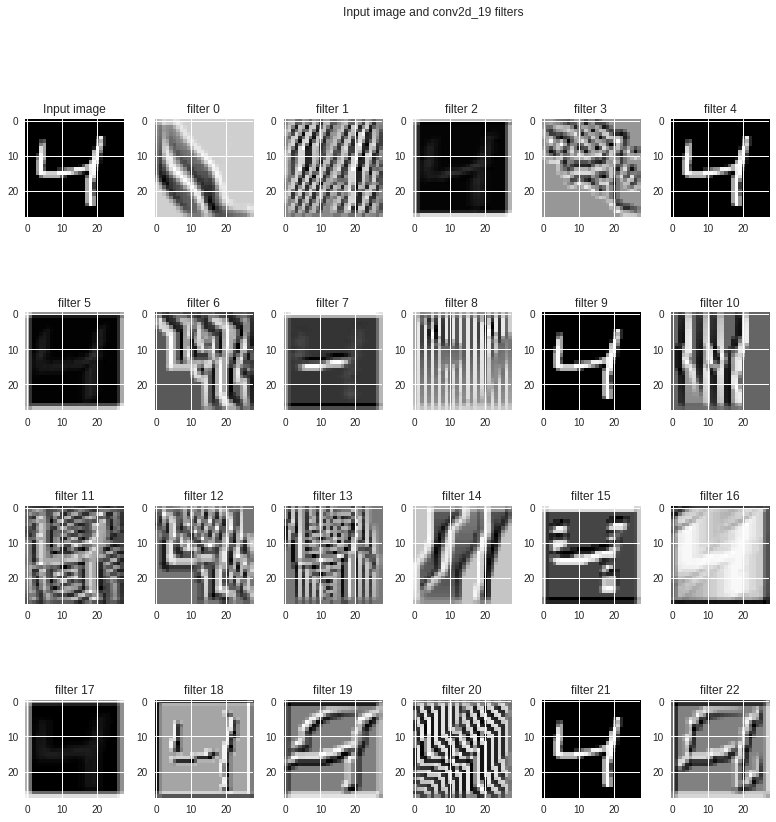

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_19'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()